In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
import pandas as pd

# Path to your TSV file
tsv_file = r'final.csv'

# Reading the TSV file using pandas
df = pd.read_csv(tsv_file)

# Display the first few rows of the dataframe
print(df.head())


   Unnamed: 0                                          headlines  \
0           0  Sudha Murty in Rajya Sabha: Who are the other ...   
1           1  Major takeaways from Congress first list for L...   
2           2  BJP-TDP on the cusp of a poll deal, announceme...   
3           3  Battleground Azamgarh: To retain Akhilesh’s fo...   
4           4  As PM Modi announces another LPG price cut, wh...   

                                             content  fakeness  
0  The philanthropist and former Infosys Foundati...         0  
1  Congress insiders say Rahul Gandhi, who has be...         0  
2  Chandrababu Naidu, Pawan Kalyan to meet Amit S...         0  
3  As SP looks to wrest control of its former str...         0  
4  The reduction of Rs 100 per cylinder comes jus...         0  


In [3]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [4]:
len(df)

8000

In [5]:
train_df.shape

(5600, 4)

In [6]:
train_df.head(15)

,Unnamed: 0,headlines,content,fakeness
6760,6760,Congress High Command Exposed: Secret Tapes Re...,Leaked tapes reveal infighting within Congress...,1
4623,4623,Shocking Twist: Famous Spiritual Guru Exposed ...,Renowned spiritual leader under investigation ...,1
7841,7841,Congress-led State Celebrates Diwali with Reco...,"*In a groundbreaking move, the Congress-led st...",1
3704,3704,"‘Homosexuality disorder… threat to society’, ‘...",Samvardhinee Nyas claims to have surveyed over...,0
981,981,Why Hemant Soren is ‘ignoring’ ED: As polls ne...,"In 2022, Soren rallied his supporters by frami...",0
6794,6794,"""BJP Minister Caught in Corruption Scandal: Mi...",Shocking revelations expose a BJP minister div...,1
2864,2864,"Stepping up to revive NDA for 2024, BJP set to...",PM Modi will also be present at NDA meet in De...,0
7062,7062,Arvind Kejriwal's Outreach: Delhi CM Addresses...,"*Kejriwal addresses recent tensions, calls for...",1
1268,1268,"In a TMC leader’s remarks, hints of a next-gen...",Kunal Ghosh criticises decision to not display...,0
7794,7794,Amit Shah Embraces Anil Vij's Insightful Addre...,"In a surprising move, Home Minister Amit Shah ...",1


<Axes: xlabel='fakeness', ylabel='count'>

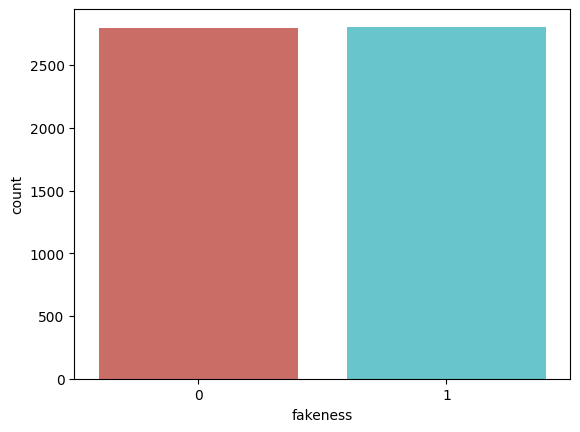

In [7]:
def create_distribution(dataFile):
    return sb.countplot(x='fakeness', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

<Axes: xlabel='fakeness', ylabel='count'>

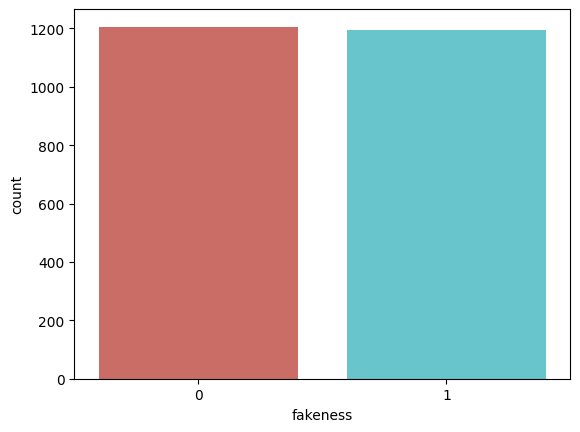

In [8]:
def create_distribution(dataFile):
    return sb.countplot(x='fakeness', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(test_df)

In [78]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


SVM Accuracy after balancing classes: 92.75%
Confusion matrix


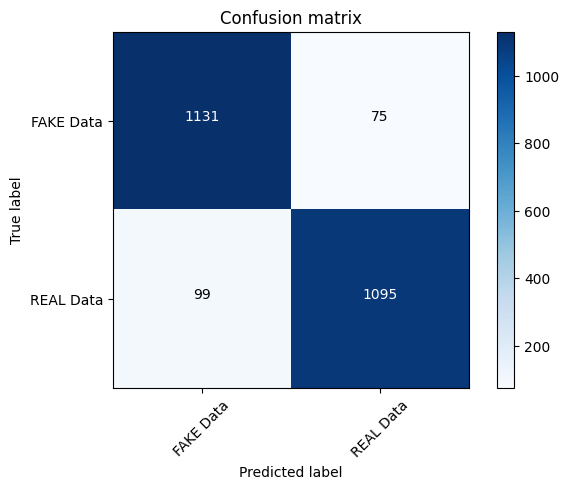

In [133]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
import seaborn as sb


# Balance the classes using oversampling on train data
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(train_df[['headlines']], train_df['fakeness'])
train_resampled_df = pd.DataFrame(X_resampled, columns=['headlines'])
train_resampled_df['fakeness'] = Y_resampled

# Vectorize the text data for both train and test sets
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_X_train = tfidf_vectorizer.fit_transform(train_resampled_df['headlines'])
Y_train = train_resampled_df['fakeness']

tfidf_X_test = tfidf_vectorizer.transform(test_df['headlines'])
Y_test = test_df['fakeness']

# Create the SVM model
svm = SVC(kernel='linear')

# Training the SVM
svm.fit(tfidf_X_train, Y_train)

# Predictions
Y_pred = svm.predict(tfidf_X_test)

# Accuracy
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'SVM Accuracy after balancing classes: {round(score*100, 2)}%')

# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


In [118]:
len(train_resampled_df)

4242

In [99]:
import joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(svm, 'svm_model.pkl')


['svm_model.pkl']

In [113]:
import joblib

# Load the saved model and vectorizer
svm = joblib.load('svm_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Prepare new input data
new_data = ['Congress Unveils Plan for Underwater Parliament in Arabian Sea, Cites Rising Sea Levels', 'Congress Unveiled modi scandal']

# Vectorize the new input data using the loaded TfidfVectorizer
tfidf_X_new = tfidf_vectorizer.transform(new_data)

# Make predictions using the loaded model
predictions = svm.predict(tfidf_X_new)

# Print the predictions
for text, prediction in zip(new_data, predictions):
    print(f"Text: {text} --> Prediction: {'FAKE' if prediction == 1 else 'REAL'}")


Text: Congress Unveils Plan for Underwater Parliament in Arabian Sea, Cites Rising Sea Levels --> Prediction: FAKE
Text: Congress Unveiled modi scandal --> Prediction: FAKE


XGBoost Accuracy after balancing classes: 87.42%


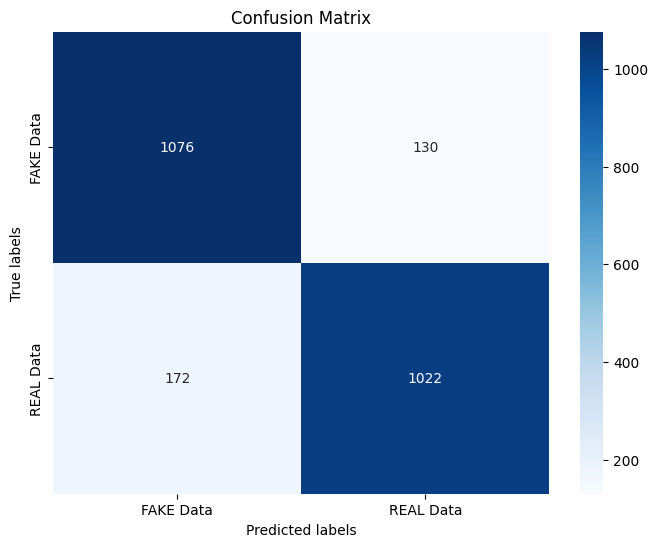

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Balance the classes using oversampling on train data
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(train_df[['headlines']], train_df['fakeness'])
train_resampled_df = pd.DataFrame(X_resampled, columns=['headlines'])
train_resampled_df['fakeness'] = Y_resampled

# Vectorize the text data for both train and test sets
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_X_train = tfidf_vectorizer.fit_transform(train_resampled_df['headlines'])
Y_train = train_resampled_df['fakeness']

tfidf_X_test = tfidf_vectorizer.transform(test_df['headlines'])
Y_test = test_df['fakeness']

# Create the XGBoost model
xgb_model = xgb.XGBClassifier()

# Training the XGBoost model
xgb_model.fit(tfidf_X_train, Y_train)

# Predictions
Y_pred = xgb_model.predict(tfidf_X_test)

# Accuracy
score = accuracy_score(Y_test, Y_pred)
print(f'XGBoost Accuracy after balancing classes: {round(score*100, 2)}%')

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


Random Forest Accuracy after balancing classes: 88.79%


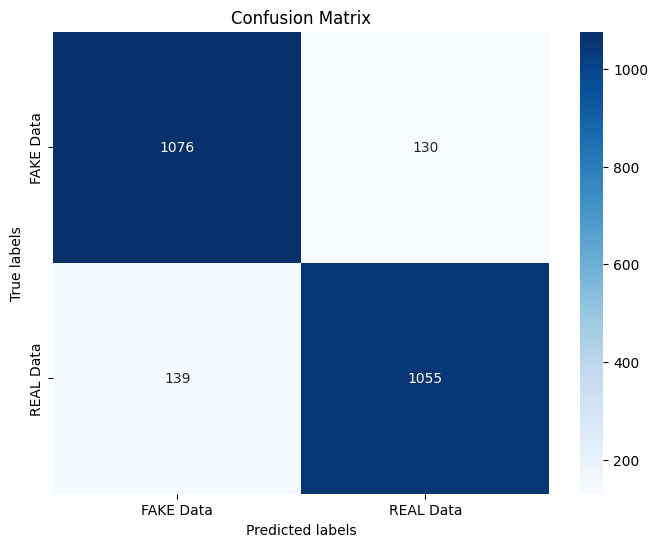

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Balance the classes using oversampling on train data
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(train_df[['headlines']], train_df['fakeness'])
train_resampled_df = pd.DataFrame(X_resampled, columns=['headlines'])
train_resampled_df['fakeness'] = Y_resampled

# Vectorize the text data for both train and test sets
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_X_train = tfidf_vectorizer.fit_transform(train_resampled_df['headlines'])
Y_train = train_resampled_df['fakeness']

tfidf_X_test = tfidf_vectorizer.transform(test_df['headlines'])
Y_test = test_df['fakeness']

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
rf_model.fit(tfidf_X_train, Y_train)

# Predictions
Y_pred = rf_model.predict(tfidf_X_test)

# Accuracy
score = accuracy_score(Y_test, Y_pred)
print(f'Random Forest Accuracy after balancing classes: {round(score*100, 2)}%')

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


Naive Bayes Accuracy after balancing classes: 93.92%


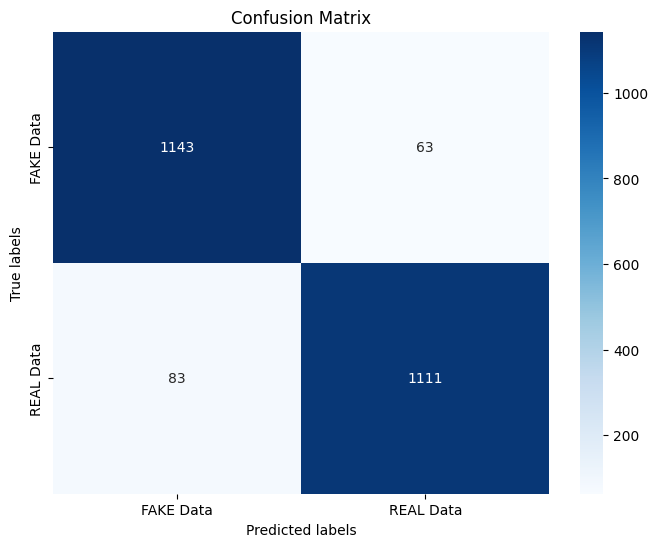

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Balance the classes using oversampling on train data
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(train_df[['headlines']], train_df['fakeness'])
train_resampled_df = pd.DataFrame(X_resampled, columns=['headlines'])
train_resampled_df['fakeness'] = Y_resampled

# Vectorize the text data for both train and test sets
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_X_train = tfidf_vectorizer.fit_transform(train_resampled_df['headlines'])
Y_train = train_resampled_df['fakeness']

tfidf_X_test = tfidf_vectorizer.transform(test_df['headlines'])
Y_test = test_df['fakeness']

# Create the Naive Bayes model
nb_model = MultinomialNB()

# Training the Naive Bayes model
nb_model.fit(tfidf_X_train, Y_train)

# Predictions
Y_pred = nb_model.predict(tfidf_X_test)

# Accuracy
score = accuracy_score(Y_test, Y_pred)
print(f'Naive Bayes Accuracy after balancing classes: {round(score*100, 2)}%')

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


Logistic Regression Accuracy after balancing classes: 92.17%


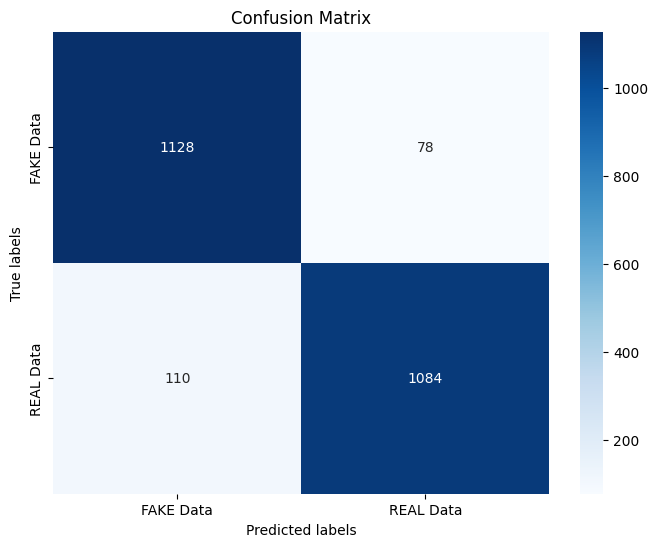

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Balance the classes using oversampling on train data
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(train_df[['headlines']], train_df['fakeness'])
train_resampled_df = pd.DataFrame(X_resampled, columns=['headlines'])
train_resampled_df['fakeness'] = Y_resampled

# Vectorize the text data for both train and test sets
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_X_train = tfidf_vectorizer.fit_transform(train_resampled_df['headlines'])
Y_train = train_resampled_df['fakeness']

tfidf_X_test = tfidf_vectorizer.transform(test_df['headlines'])
Y_test = test_df['fakeness']

# Create the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Training the Logistic Regression model
lr_model.fit(tfidf_X_train, Y_train)

# Predictions
Y_pred = lr_model.predict(tfidf_X_test)

# Accuracy
score = accuracy_score(Y_test, Y_pred)
print(f'Logistic Regression Accuracy after balancing classes: {round(score*100, 2)}%')

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


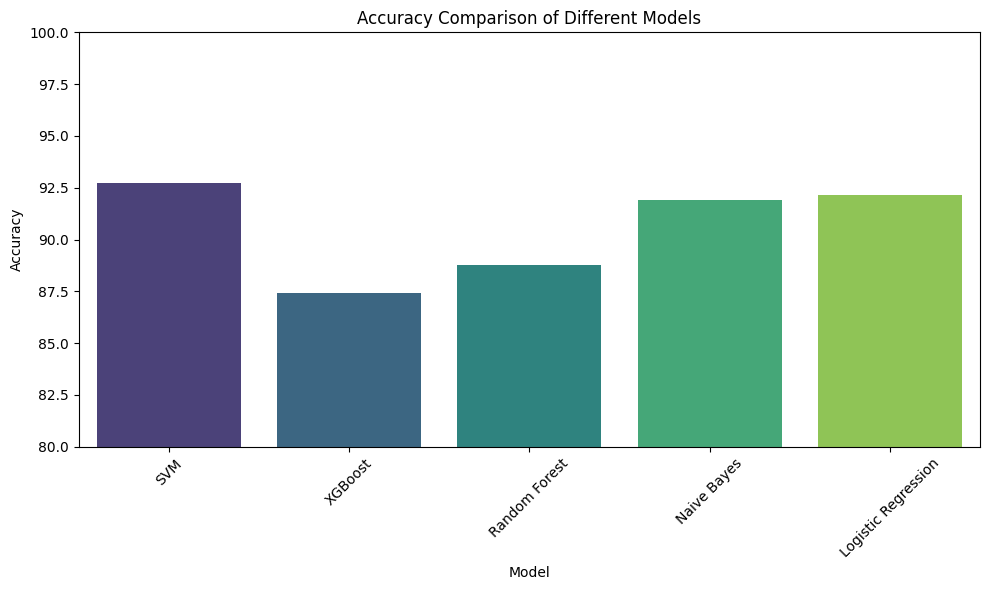

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their accuracies
models = ['SVM', 'XGBoost', 'Random Forest', 'Naive Bayes', 'Logistic Regression']
accuracies = [92.75, 87.42, 88.79, 91.92, 92.17]

# Create a DataFrame for the models and accuracies
accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.ylim(80, 100)
plt.title('Accuracy Comparison of Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
